<a href="https://colab.research.google.com/github/Darshan-Deepak/DS/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is done on the fuel stations drilled in New Jersey. Digital Geodata Series DGS17-1 Oil and Natural Gas Exploration Wells Drilled In New Jersey, this data set was taken from Department of environmental protection. https://www.nj.gov/dep/njgs/geodata/dgs17-1.htm

DARSHAN DEEPAK

# PS0

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [3]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

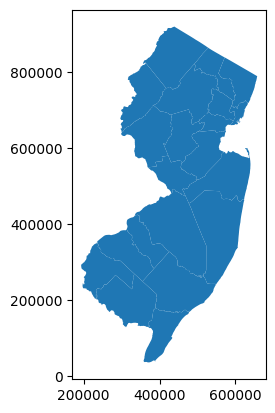

In [4]:
njC0.plot()

## THEMATIC/CHOLORLETH MAPS

In [5]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')

In [6]:
njC0.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [7]:
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

<Axes: >

[]

[]

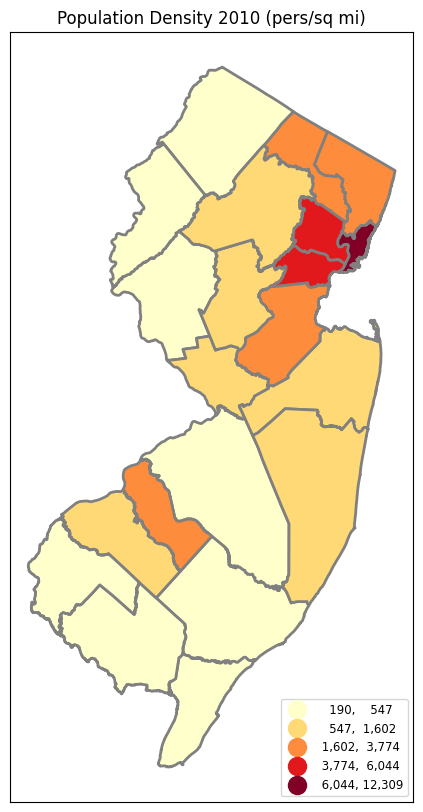

In [8]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

oilgas wells in new jersey dataset

In [9]:
! wget -q -O njc0.zip https://docs.google.com/uc?id=1YW1RclPKsBCKvGXg9-kXBPsXx7oaoKkl&export=download
zip_ref = zipfile.ZipFile('njc0.zip','r');
zip_ref.extractall();
zip_ref.close()

geo =gpd.read_file('OilGasWells.shp')
geo.dtypes
geo.head(5)

ID             float64
COMPANY_NA      object
WELL_NA         object
COUNTY          object
MUN             object
PERMIT_NUM      object
CNSTR_DAT       object
TOTALDPTH       object
NOTES           object
NORTHING       float64
EASTING        float64
LATITUDE       float64
LONGITUDE      float64
geometry      geometry
dtype: object

,ID,COMPANY_NA,WELL_NA,COUNTY,MUN,PERMIT_NUM,CNSTR_DAT,TOTALDPTH,NOTES,NORTHING,EASTING,LATITUDE,LONGITUDE,geometry
0,1.0,Property of John Garrison,Garrison,Bergen,Mahwah Twp,None,before 1868,400,near Darlington,812945.000000,572431.000000,410353.347,741231.526,POINT (572431.000 812945.000)
1,3.0,Cumberland Oil & Gas Co. Steelman Farm,Cumberland,Cumberland,Millville City,35-13-461,1916,705,3 miles east of Millville. Atlas sheet coordin...,202017.500000,357750.900000,392313.415,745831.626,POINT (357750.900 202017.500)
2,7.0,"The N.J. Gas Fields Co., Inc.",Driver 1,Monmouth,Jackson Twp,28-33-636,1919-20,1100+,Location base on atlas sheet coordinates in fi...,471501.400000,501014.600000,400740.406,742805.546,POINT (501014.600 471501.400)
3,8.0,"The N.J. Gas Fields Co., Inc., Donna Mathews L...",Driver 2,Ocean,Jackson Twp,None,1919-21,3342,"In 1929 drilled out side of csg from 2,200 to ...",478994.658333,541657.591667,400853.980,741922.080,POINT (541657.592 478994.658)
4,9.0,"The N.J. Gas Fields Co., Inc., Donna Mathews L...",Driver 3,Ocean,Jackson Twp,None,1921-29,5022,The location is based on the atlas sheet coor...,479262.887500,541181.029167,400856.640,741928.200,POINT (541181.029 479262.888)


In [10]:
geo['enr'] = geo.NORTHING.astype(float)

<Axes: >

<Axes: >

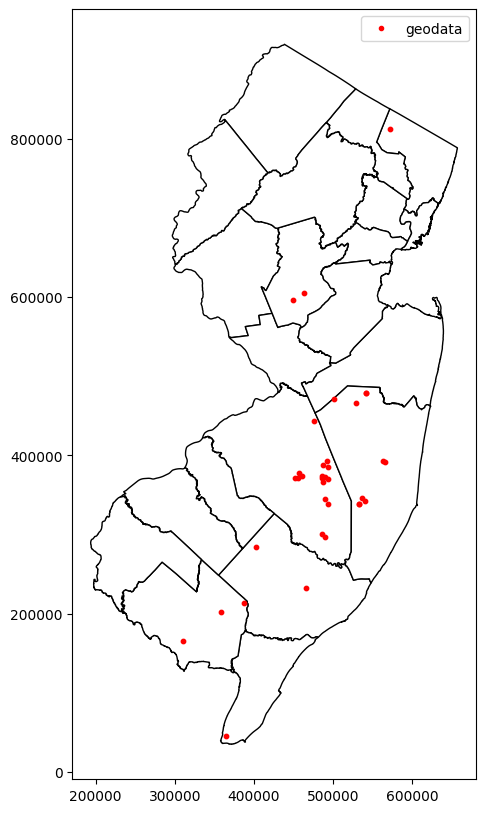

In [11]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
geo.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='geodata', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

Now I took a dataset which has the number of gas stations in New Jersey.
https://afdc.energy.gov/stations/#/analyze?region=US-NJ&show_map=true&country=US&access=public&access=private&fuel=BD&fuel=CNG&fuel=E85&fuel=HY&fuel=LNG&fuel=LPG&fuel=ELEC&lpg_secondary=true&hy_nonretail=true&ev_levels=all

In [12]:
! wget -q -O fuel.csv https://docs.google.com/uc?id=1Qf61l9jDvZtbw_AoAW4PZ1eHwBq2K4zN&export=download

#zip_ref = zipfile.ZipFile('crash.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
fuel=gpd.read_file('fuel.csv')

In [13]:
fuel.head(5)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,geometry
0,LPG,Awisco,24 Lakeside Ave,At Standish,West Orange,NJ,07052,,973-736-0200,E,...,false,,,,,,,,HD,None
1,LPG,Modern Propane Gas Co,199 Route 46 W,1 mile west of Teterboro Airport,Lodi,NJ,07644,,973-778-0812,E,...,false,,,,,,,,HD,None
2,LPG,U-Haul,276 Tonnelle Ave,At Tonnelle Cir,Jersey City,NJ,07306,,201-963-6176,E,...,false,,,,,,,,HD,None
3,LPG,U-Haul,397 Route 18 S,"East of New Jersey Turnpike, just past Lowe's.",East Brunswick,NJ,08816,,732-254-9148,E,...,false,,,,,,,,HD,None
4,CNG,New Jersey Natural Gas - Ocean Division Operat...,775 Vassar Ave,,Lakewood Township,NJ,08701,,732-919-8000,E,...,,,,,,,false,,HD,None


In [14]:
fuel1=fuel[['Fuel Type Code','City']]
fuel1.rename(columns={'Fuel Type Code': 'fuel_code'}, inplace=True)
fuel1.rename(columns={'City': 'COUNTY'}, inplace=True)
fuel1

<ipython-input-14-c2ceffaa5b0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel1.rename(columns={'Fuel Type Code': 'fuel_code'}, inplace=True)
<ipython-input-14-c2ceffaa5b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel1.rename(columns={'City': 'COUNTY'}, inplace=True)


,fuel_code,COUNTY
0,LPG,West Orange
1,LPG,Lodi
2,LPG,Jersey City
3,LPG,East Brunswick
4,CNG,Lakewood Township
...,...,...
1254,ELEC,Cape May Court House
1255,ELEC,North Brunswick Township
1256,ELEC,Newark
1257,ELEC,Hamilton Township


In [15]:
fuel2=fuel1.iloc[1:,:]
fuel2

,fuel_code,COUNTY
1,LPG,Lodi
2,LPG,Jersey City
3,LPG,East Brunswick
4,CNG,Lakewood Township
5,CNG,Jersey City
...,...,...
1254,ELEC,Cape May Court House
1255,ELEC,North Brunswick Township
1256,ELEC,Newark
1257,ELEC,Hamilton Township


In [16]:
fuel2['FUEL_CODE']=fuel2['fuel_code'].str.upper()
fuel1=fuel2
fuel1

<ipython-input-16-0810a8e6d07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel2['FUEL_CODE']=fuel2['fuel_code'].str.upper()


,fuel_code,COUNTY,FUEL_CODE
1,LPG,Lodi,LPG
2,LPG,Jersey City,LPG
3,LPG,East Brunswick,LPG
4,CNG,Lakewood Township,CNG
5,CNG,Jersey City,CNG
...,...,...,...
1254,ELEC,Cape May Court House,ELEC
1255,ELEC,North Brunswick Township,ELEC
1256,ELEC,Newark,ELEC
1257,ELEC,Hamilton Township,ELEC


In [17]:
fuel_gs = fuel1.head(50)
fuel_gs

,fuel_code,COUNTY,FUEL_CODE
1,LPG,Lodi,LPG
2,LPG,Jersey City,LPG
3,LPG,East Brunswick,LPG
4,CNG,Lakewood Township,CNG
5,CNG,Jersey City,CNG
6,BD,Maplewood,BD
7,BD,Princeton,BD
8,E85,Princeton,E85
9,E85,Shamong,E85
10,CNG,Trenton,CNG


In [18]:
geo['TOTALDPTH'] = geo['TOTALDPTH'].astype(str)
geo['TOTALDPTH'] = geo['TOTALDPTH'].str.replace('+', '', regex=False)

In [19]:
geo['TOTALDPTH'] = geo['TOTALDPTH'].astype(float)

In [20]:
njCG = pd.merge(geo, fuel1, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
njCG[['FUEL_CODE','COUNTY','TOTALDPTH','_merge']] #all good, NEW JERSEY expected not to merge

njC2 = pd.merge(geo, fuel1, left_on = 'COUNTY', right_on = 'COUNTY',how='inner')

,FUEL_CODE,COUNTY,TOTALDPTH,_merge
0,NaN,Bergen,400.0,left_only
1,NaN,Cumberland,705.0,left_only
2,NaN,Cumberland,3720.0,left_only
3,NaN,Cumberland,1200.0,left_only
4,NaN,Monmouth,1100.0,left_only
...,...,...,...,...
1433,ELEC,Jackson Township,NaN,right_only
1434,ELEC,Parsippany Troy Hills,NaN,right_only
1435,ELEC,Stone Harbor,NaN,right_only
1436,ELEC,Bernards,NaN,right_only


<Axes: >

[]

[]

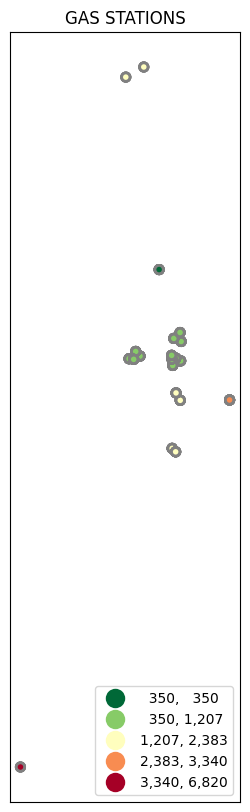

In [21]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='TOTALDPTH',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title("white color=missing")
ax.title.set_text("GAS STATIONS")
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xlabel('''source/definition: zillow.com/research/data''')

In [22]:
unique_values = njC2['TOTALDPTH'].unique()
print(unique_values)

[2383. 2100. 1140.  881. 1207.  900.  908.  902.  852.  928.  954.  952.
 1515. 1519. 1701. 1658. 3200.  350. 3340. 6820.]


<Axes: >

<Axes: >

[]

[]

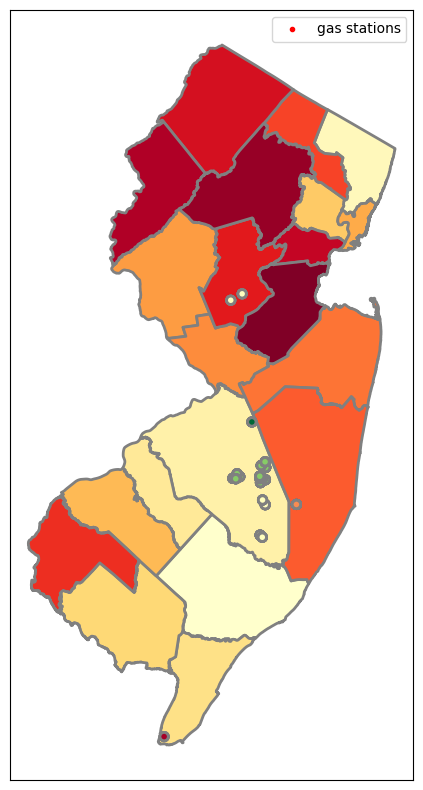

In [23]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
njC2.plot(ax=ax,column='TOTALDPTH',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.set_xticks([])
ax.set_yticks([])
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='gas stations', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

# PS3

Here we can relate the difference between gas stations digged in new jersey and the alternative fuel vechiles like EV, METHANOL ETC...

ALTERNATIVE FUELED VECHILES

In [24]:
! wget -q -O AFV.geojson https://docs.google.com/uc?id=1mKH6odkpzDXnpXTfudf13OhwpqzcLJpN&export=download

#zip_ref = zipfile.ZipFile('crash.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njCA=gpd.read_file('AFV.geojson')

In [25]:
njCA.head(5)
njCA.columns

,OBJECTID,FUEL_TYPE,STATION_NAME,STREET_ADDRESS,CITY,STATE,ZIP,STATION_PHONE,STATUS_CODE,GROUPS_WITH_ACCESS,...,OPEN_DATE,NJSPC83_X,NJSPC83_Y,FACILITY_TYPE,ACCESS_CODE,CNG_FILL_TYPE,CNG_PSI,EV_PRICING,CNG_VEHICLE_CLASS,geometry
0,1,ELEC,Dock's Oyster House - Tesla Destination,2405 Atlantic Ave,Atlantic City,NJ,08401,609-345-0092 877-798-3752,E,Public,...,2017-11-20,508764,190802,RESTAURANT,public,None,None,Free,None,POINT (-74.44115 39.35723)
1,2,ELEC,Central United Methodist Church,5 Marvin Ave,Linwood,NJ,08221,None,E,Private,...,2019-12-12,474847,191007,PLACE_OF_WORSHIP,private,None,None,None,None,POINT (-74.56111 39.35779)
2,3,ELEC,RESORTS CASINO SURFACE LOT,1201 Boardwalk,Atlantic City,NJ,08401,888-758-4389,E,Public,...,2023-09-01,513905,191306,None,public,None,None,None,None,POINT (-74.42297 39.35860)
3,4,ELEC,FAA - ACT - Station 1,1822 Atlantic Ave,Atlantic City,NJ,08401,None,E,Private,...,2021-01-15,510927,191779,FED_GOV,private,None,None,Free,None,POINT (-74.43350 39.35991)
4,5,ELEC,FAA - ACT - Station 2,1822 Atlantic Ave,Atlantic City,NJ,08401,None,E,Private,...,2021-01-15,510927,191779,FED_GOV,private,None,None,None,None,POINT (-74.43350 39.35991)


Index(['OBJECTID', 'FUEL_TYPE', 'STATION_NAME', 'STREET_ADDRESS', 'CITY',
       'STATE', 'ZIP', 'STATION_PHONE', 'STATUS_CODE', 'GROUPS_WITH_ACCESS',
       'ACCESS_INFO', 'ACCESS_HOURS', 'CARDS_ACCEPTED', 'BD_BLENDS',
       'EV_LEVEL_1', 'EV_LEVEL_2', 'EV_DC_FAST', 'EV_NETWORK',
       'EV_NETWORK_WEBSITE', 'GEOCODE_STATUS', 'OWNER_TYPE',
       'FEDERAL_AGENCY_ID', 'FEDERAL_AGENCY_NAME', 'LPG_PRIMARY',
       'E85_BLENDER', 'EV_CONNECTOR_TYPE', 'LATITUDE', 'LONGITUDE',
       'DATE_LAST_CONFIRMED', 'ID', 'UPDATED_AT', 'OPEN_DATE', 'NJSPC83_X',
       'NJSPC83_Y', 'FACILITY_TYPE', 'ACCESS_CODE', 'CNG_FILL_TYPE', 'CNG_PSI',
       'EV_PRICING', 'CNG_VEHICLE_CLASS', 'geometry'],
      dtype='object')

In [26]:
njCAB = njCA[['CITY', 'STREET_ADDRESS']]
njCAB.rename(columns={'CITY': 'COUNTY'}, inplace=True)
njCAB

<ipython-input-26-b079320d52cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njCAB.rename(columns={'CITY': 'COUNTY'}, inplace=True)


,COUNTY,STREET_ADDRESS
0,Atlantic City,2405 Atlantic Ave
1,Linwood,5 Marvin Ave
2,Atlantic City,1201 Boardwalk
3,Atlantic City,1822 Atlantic Ave
4,Atlantic City,1822 Atlantic Ave
...,...,...
1269,Mahwah,933 MacArthur Blvd
1270,Mahwah,933 MacArthur Blvd
1271,Mahwah,933 MacArthur Blvd
1272,Mahwah,933 MacArthur Blvd


In [27]:
njC.COUNTY_LAB

0       Atlantic County
1         Bergen County
2     Burlington County
3         Camden County
4       Cape May County
5     Cumberland County
6          Essex County
7     Gloucester County
8         Hudson County
9      Hunterdon County
10        Mercer County
11      Monmouth County
12         Ocean County
13       Passaic County
14         Salem County
15      Somerset County
16        Sussex County
17         Union County
18        Warren County
19        Morris County
20     Middlesex County
Name: COUNTY_LAB, dtype: object

In [28]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC['U.S. County']

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: U.S. County, dtype: object

In [29]:
njCAB = pd.merge(njC, njCAB, on = 'COUNTY',how='outer',indicator=True)
njCAB[['COUNTY', 'STREET_ADDRESS','_merge']].head(50)

,COUNTY,STREET_ADDRESS,_merge
0,ATLANTIC,NaN,left_only
1,BERGEN,NaN,left_only
2,BURLINGTON,NaN,left_only
3,CAMDEN,NaN,left_only
4,CAPE MAY,NaN,left_only
5,CUMBERLAND,NaN,left_only
6,ESSEX,NaN,left_only
7,GLOUCESTER,NaN,left_only
8,HUDSON,NaN,left_only
9,HUNTERDON,NaN,left_only


In [30]:
njCAB[['COUNTY','STREET_ADDRESS','STREET_ADDRESS']]

,COUNTY,STREET_ADDRESS,STREET_ADDRESS
0,ATLANTIC,NaN,NaN
1,BERGEN,NaN,NaN
2,BURLINGTON,NaN,NaN
3,CAMDEN,NaN,NaN
4,CAPE MAY,NaN,NaN
...,...,...,...
1290,Vernon Township,885 Warwick Turnpike,885 Warwick Turnpike
1291,Sussex,375 NJ-23,375 NJ-23
1292,Sussex,500 NJ 23,500 NJ 23
1293,Montague,1480 NJ-23,1480 NJ-23


In [31]:
df = pd.DataFrame(njCAB)
g = df.set_geometry("geometry")

In [32]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [33]:
gdf = geopandas.GeoDataFrame(
    njCA, geometry=geopandas.points_from_xy(njCA.NJSPC83_X, njCA.NJSPC83_Y) #, crs="EPSG:4326"
)

In [34]:
print(gdf.head(30))

    OBJECTID FUEL_TYPE                                       STATION_NAME  \
0          1      ELEC            Dock's Oyster House - Tesla Destination   
1          2      ELEC                    Central United Methodist Church   
2          3      ELEC                         RESORTS CASINO SURFACE LOT   
3          4      ELEC                              FAA - ACT - Station 1   
4          5      ELEC                              FAA - ACT - Station 2   
5          6      ELEC                                             WAVE 1   
6          7      ELEC                                             WAVE 6   
7          8      ELEC                                             WAVE 4   
8          9      ELEC                                             WAVE 3   
9         10      ELEC                                             WAVE 5   
10        11      ELEC                                             WAVE 2   
11        12      ELEC            Ocean Resort Casino - Tesla Destination   

<Axes: >

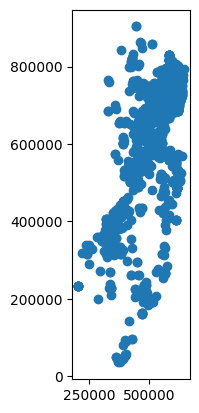

In [35]:
gdf.plot()

In [36]:
gdf['ex']=gdf['NJSPC83_X'].astype(float)

In [37]:
njCAB_cam_cum=njCAB.query("COUNTY=='CAMDEN' | COUNTY=='CAPE MAY'")

<Axes: >

[]

[]

Text(0.5, 1.0, 'Alternative Fueled Vehicle')

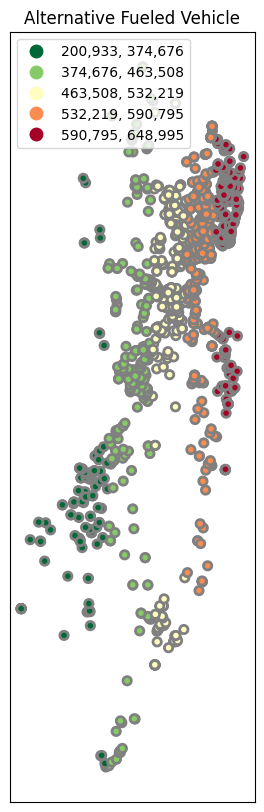

In [38]:
fig, ax = plt.subplots(figsize=(6,10))

gdf.plot(ax=ax,figsize=(20,30),column='ex',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
l1 = ax.get_legend()
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Alternative Fueled Vehicle')



<Axes: >

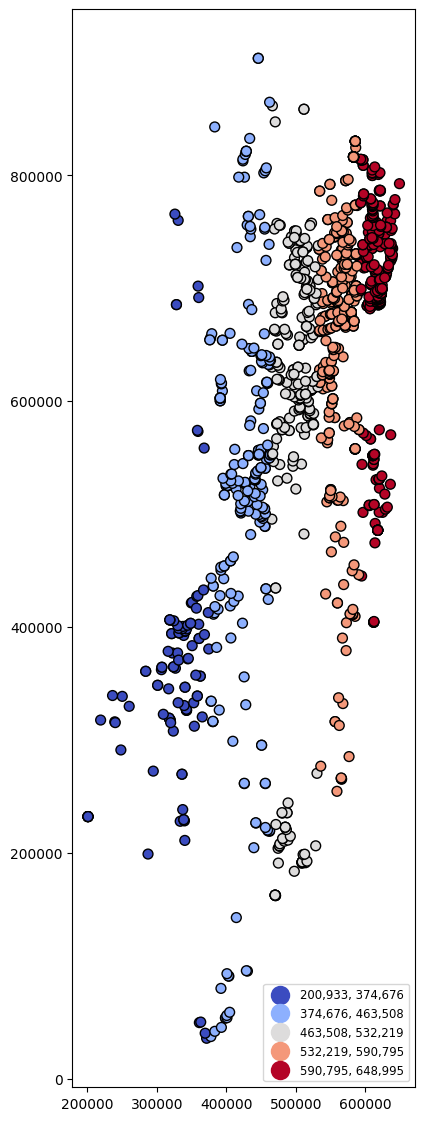

In [39]:
fig, ax = plt.subplots(1, figsize=(14,14))

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 50)

<Axes: >

'gdf.plot(ax=ax,column=\'ex\',legend=True,cmap=\'YlGnBu\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})'

Text(0.5, 1.0, 'X')

[]

[]

<Axes: title={'center': 'X'}>

<Axes: title={'center': 'AFV IN NJ'}>

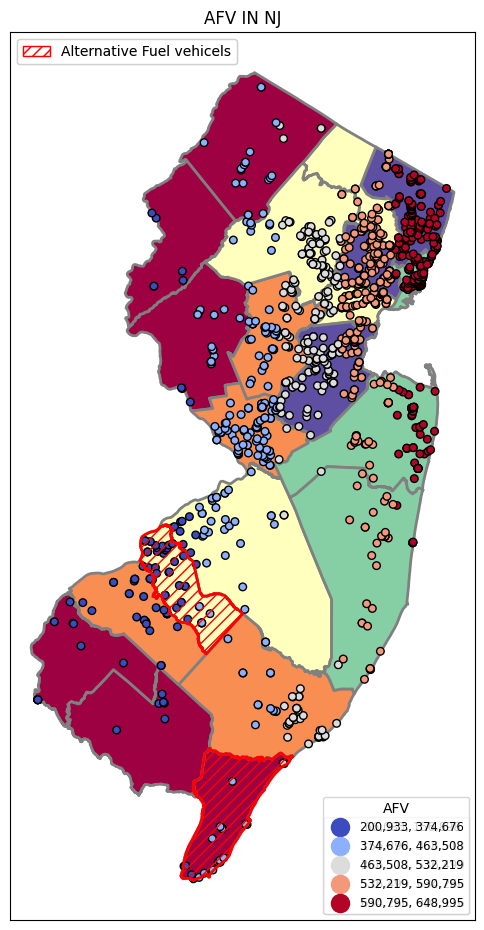

In [40]:
fig, ax = plt.subplots(1, figsize=(6,14))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
'''gdf.plot(ax=ax,column='ex',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})'''


l1 = ax.get_legend()
ax.set_title('X')
ax.set_xticks([]);ax.set_yticks([])
ax.add_artist(l1)

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 30)

ax.title.set_text("AFV IN NJ")

l2 = ax.get_legend()
l2.set_title('Alternative Fueled Vehicle')


njCAB_cam_cum.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

l1 = ax.get_legend()
l1.set_title('''AFV''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Alternative Fuel vehicels')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

'gdf.plot(ax=ax,column=\'ex\',legend=True,cmap=\'YlGnBu\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})'

Text(0.5, 1.0, 'X')

[]

[]

<Axes: title={'center': 'X'}>

Text(400000, 925000, 'more stations')

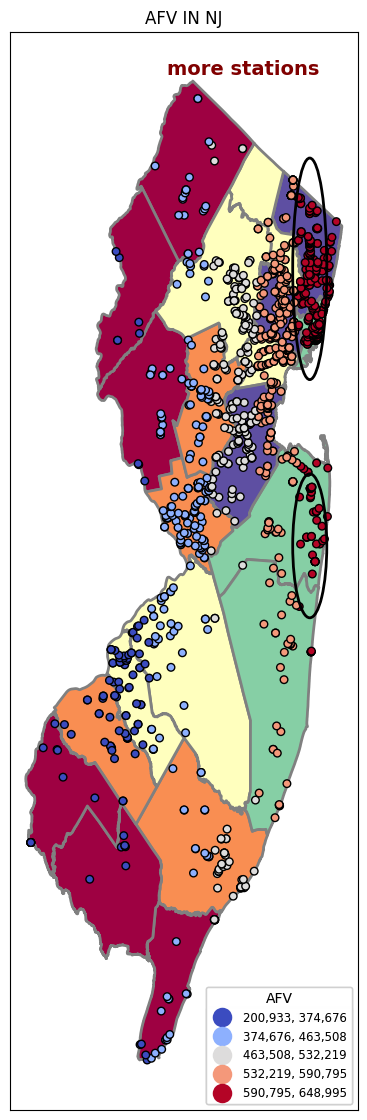

In [41]:
fig, ax = plt.subplots(1, figsize=(6,14))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
'''gdf.plot(ax=ax,column='ex',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})'''


l1 = ax.get_legend()
ax.set_title('X')
ax.set_xticks([]);ax.set_yticks([])
ax.add_artist(l1)

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 30)

ax.title.set_text("AFV IN NJ")

l2 = ax.get_legend()
l2.set_title('Alternative Fueled Vehicle')


#njCAB_cam_cum.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

l1 = ax.get_legend()
l1.set_title('''AFV''')


ax.add_artist(l2)
ax.add_artist(l1)

ax.text(400000, 925000, r'more stations', fontsize=14, color='maroon',fontweight='bold')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(610000, 750000), width=50000, height=200000, edgecolor='black', fc='None', lw=2)
e2 = Ellipse(xy=(610000, 500000), width=50000, height=130000, edgecolor='black', fc='None', lw=2)
ax.add_patch(e1)
ax.add_patch(e2)

PS4

In [42]:
! wget -q -O EV_NJ.geojson https://docs.google.com/uc?id=17KB-eJp3w24299mxqkuw2hlZ6SlZDX8i&export=download

#zip_ref = zipfile.ZipFile('Tran_road.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njCD=gpd.read_file('EV_NJ.geojson')

In [43]:
njCD.head(5)
njCD.columns

,name,type,info,latitude,longitude,geometry
0,JC Public Charger - Riverview Park,JC Public Charger,Along Ogden Ave at Riverview Park1 ChargePoint...,40.7441381,-74.0431473,POINT (-74.04315 40.74414)
1,JC Public Charger - Bethune Center Parking Lot,JC Public Charger,MLK Ave/Fulton Ave Parking Lot by the Bethune ...,40.7047085,-74.0871202,POINT (-74.08712 40.70471)
2,JC Public Charger - City Hall,JC Public Charger,On the corner of Marin Blvd & Montgomery St 1 ...,40.7170907,-74.0424898,POINT (-74.04249 40.71709)
3,JC Public Charger - Central Ave,JC Public Charger,Parking Authority Office 394 Central Ave Charg...,40.748175,-74.0477847,POINT (-74.04778 40.74818)
4,JC Public Charger - City Hall,JC Public Charger,On the corner of Marin Blvd & Montgomery St 1 ...,40.7171497,-74.0424779,POINT (-74.04248 40.71715)


Index(['name', 'type', 'info', 'latitude', 'longitude', 'geometry'], dtype='object')

<Axes: >

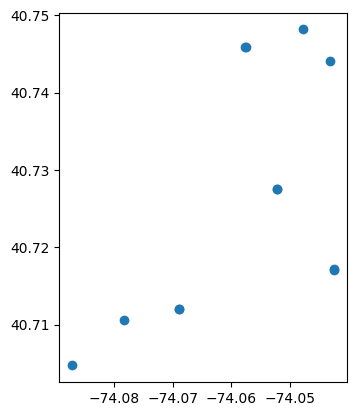

In [44]:
njCD.plot()

In [45]:
df = pd.DataFrame(njCD)
g = df.set_geometry("geometry")

In [46]:
g.dtypes

name           object
type           object
info           object
latitude       object
longitude      object
geometry     geometry
dtype: object

In [47]:
gdf = geopandas.GeoDataFrame(
    njCD, geometry=geopandas.points_from_xy(njCD.latitude,njCD.longitude),
crs="EPSG:4326"
)

In [48]:
print(gdf.head(5))

                                             name               type  \
0              JC Public Charger - Riverview Park  JC Public Charger   
1  JC Public Charger - Bethune Center Parking Lot  JC Public Charger   
2                  JC Public Charger  - City Hall  JC Public Charger   
3                 JC Public Charger - Central Ave  JC Public Charger   
4                   JC Public Charger - City Hall  JC Public Charger   

                                                info    latitude    longitude  \
0  Along Ogden Ave at Riverview Park1 ChargePoint...  40.7441381  -74.0431473   
1  MLK Ave/Fulton Ave Parking Lot by the Bethune ...  40.7047085  -74.0871202   
2  On the corner of Marin Blvd & Montgomery St 1 ...  40.7170907  -74.0424898   
3  Parking Authority Office 394 Central Ave Charg...   40.748175  -74.0477847   
4  On the corner of Marin Blvd & Montgomery St 1 ...  40.7171497  -74.0424779   

                     geometry  
0  POINT (40.74414 -74.04315)  
1  POINT (40.704

<Axes: >

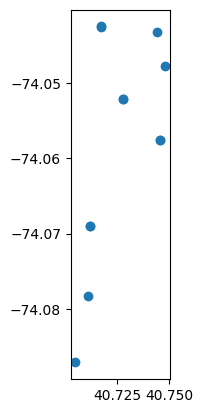

In [49]:
gdf.plot()

In [50]:
gdf['dd']=gdf['latitude'].astype(float)

In [51]:
'''fig, ax = plt.subplots(figsize=(6,10))

gdf.plot(ax=ax,figsize=(20,30),column='dd',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
l1 = ax.get_legend()
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Alternative Fueled Vehicle')'''

'fig, ax = plt.subplots(figsize=(6,10))\n\ngdf.plot(ax=ax,figsize=(20,30),column=\'dd\',legend=True,cmap=\'RdYlGn_r\',\n          scheme=\'natural_breaks\',k=5, edgecolor=\'grey\',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})\nl1 = ax.get_legend()\nax.set_xticks([]) #kills xticks\nax.set_yticks([]) #kills xticks\nax.set_title(\'Alternative Fueled Vehicle\')'

<Axes: >

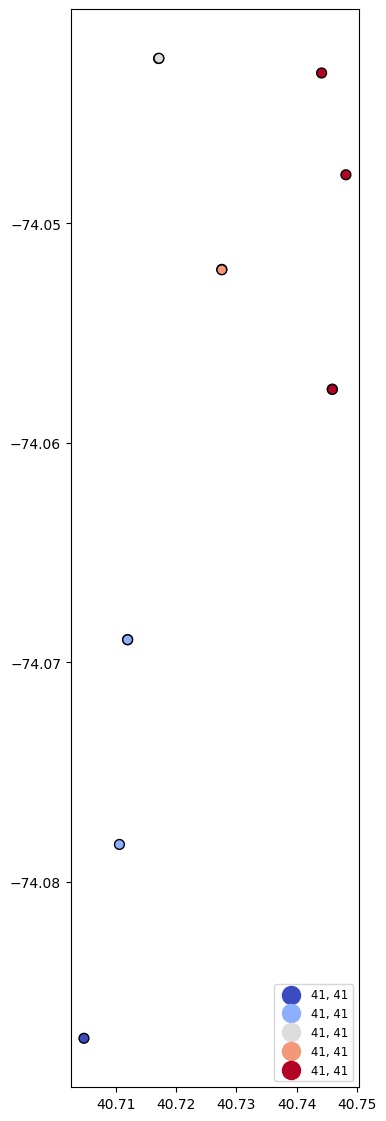

In [52]:
fig, ax = plt.subplots(1, figsize=(14,14))

gdf.plot(ax=ax,column='dd',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 50)

<Axes: >

<Axes: >

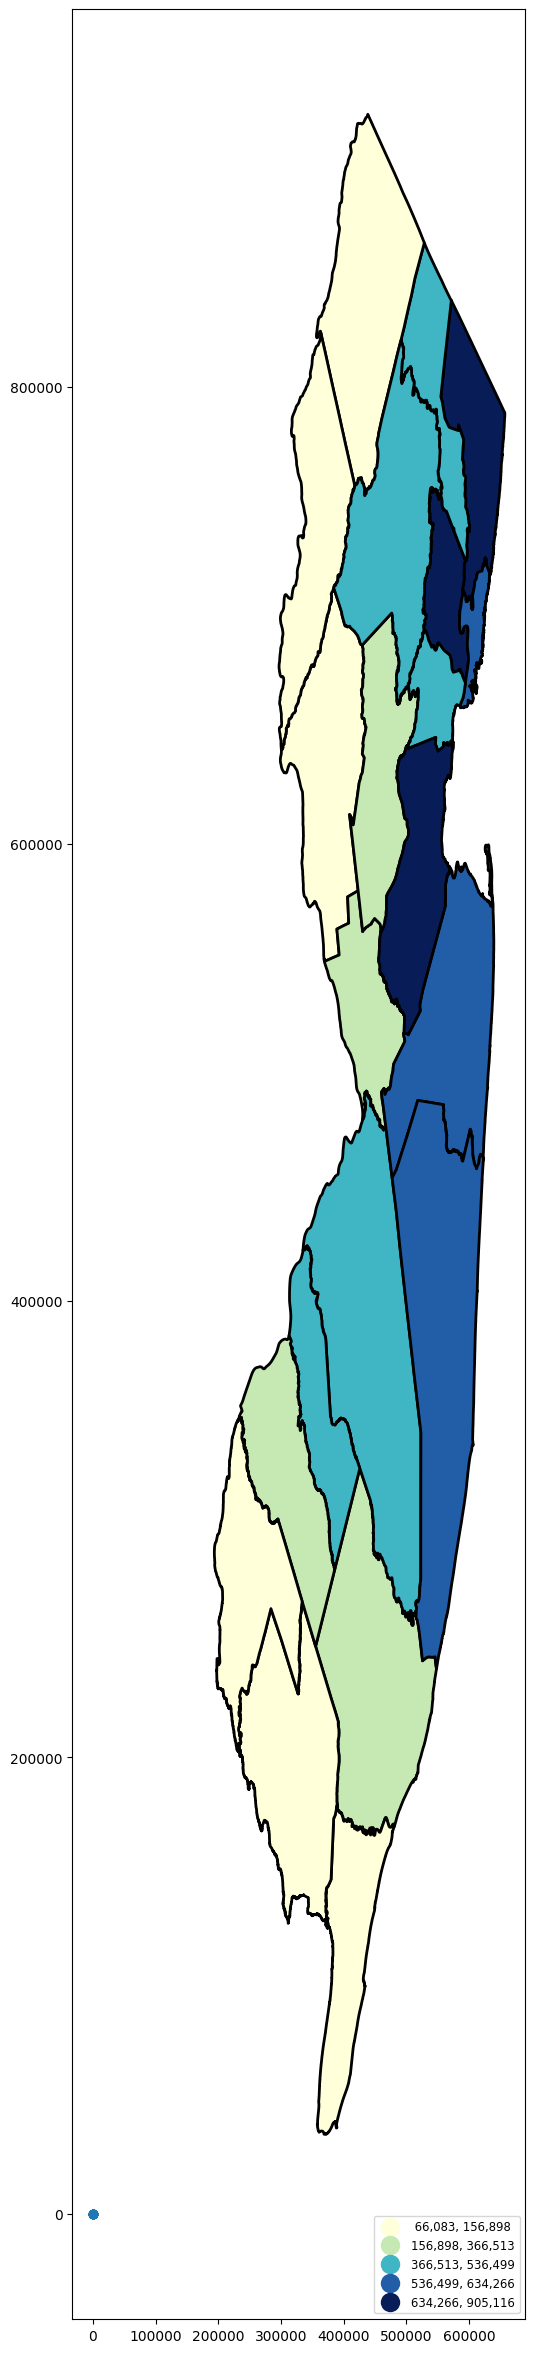

In [53]:
fig, ax = plt.subplots(1, figsize=(6,30))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
gdf.plot(ax=ax)

## Folium

For PS4 iI had done the folium maps.

In [54]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
!pip install mapclassify
import mapclassify

In [56]:
f.Map(location=[40, -75])

In [57]:
location = geolocator.geocode("401 cooper st camden nj")
location.address

'401, Cooper Street, Westmont, Haddon Township, Camden County, New Jersey, 08108, United States'

In [58]:
(location.latitude, location.longitude)

(39.915097, -75.047878)

In [59]:
location[1]

(39.915097, -75.047878)

In [60]:
f.Map(location=location[1])

In [61]:
m = f.Map(location=geolocator.geocode("700 cooper st, Camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("700 cooper st, Camden nj")[1], popup='Sunoco'))
m.add_child(f.Marker(geolocator.geocode("1013 Newton Ave, Camden nj")[1], popup='EC'))
m.add_child(f.Marker(geolocator.geocode("1033 Kaighn Ave, Camden nj")[1], popup='Liberty Gas Camden'))
m.add_child(f.Marker(geolocator.geocode("1839 Admiral Wilson Blvd, Camden nj")[1], popup='bp'))
m.add_child(f.CircleMarker(geolocator.geocode("2474 Baird Blvd, Camden nj")[1], popup='EASTCOAST'))
m.add_child(f.CircleMarker(geolocator.geocode("1033 Kaighn Ave, Camden nj")[1], popup='camden shell'))
m.save('m.html') #and click on the left folder icon and download and open in webbrowser

In [66]:
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("700 cooper st camden nj")[1],
                     popup='Sunoco',icon = f.Icon(icon = 'gas' ,color = 'red')))
m.add_child(f.CircleMarker(geolocator.geocode("1013 Newton Ave, Camden, NJ 08103")[1], popup='EC'
,color='#8A2BE2',fill_color='#F0F8FF'))

In [70]:
!wget -q -O AFV.geojson https://docs.google.com/uc?id=1mKH6odkpzDXnpXTfudf13OhwpqzcLJpN&export=download

njCA=gpd.read_file('AFV.geojson')
len(njCA)

njCA=njCA[0:1000]
njCA.head(3)

1274

,OBJECTID,FUEL_TYPE,STATION_NAME,STREET_ADDRESS,CITY,STATE,ZIP,STATION_PHONE,STATUS_CODE,GROUPS_WITH_ACCESS,...,OPEN_DATE,NJSPC83_X,NJSPC83_Y,FACILITY_TYPE,ACCESS_CODE,CNG_FILL_TYPE,CNG_PSI,EV_PRICING,CNG_VEHICLE_CLASS,geometry
0,1,ELEC,Dock's Oyster House - Tesla Destination,2405 Atlantic Ave,Atlantic City,NJ,08401,609-345-0092 877-798-3752,E,Public,...,2017-11-20,508764,190802,RESTAURANT,public,None,None,Free,None,POINT (-74.44115 39.35723)
1,2,ELEC,Central United Methodist Church,5 Marvin Ave,Linwood,NJ,08221,None,E,Private,...,2019-12-12,474847,191007,PLACE_OF_WORSHIP,private,None,None,None,None,POINT (-74.56111 39.35779)
2,3,ELEC,RESORTS CASINO SURFACE LOT,1201 Boardwalk,Atlantic City,NJ,08401,888-758-4389,E,Public,...,2023-09-01,513905,191306,None,public,None,None,None,None,POINT (-74.42297 39.35860)


In [73]:
m = f.Map(location=(39.947189, -75.121843), zoom_start=12)

loc = []
for each in njCA.iterrows():
    loc.append([each[1]['NJSPC83_Y'],each[1]['NJSPC83_X']])

loc[1:3]

m.add_children(MarkerCluster(locations=loc))

[[191007, 474847], [191306, 513905]]

<ipython-input-73-2ac1d27d4bf0>:9: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  m.add_children(MarkerCluster(locations=loc))
